In [1]:
# fmt: off
import numpy as np

# For building linear regression model and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split  # Does it performs autometically?
from sklearn.metrics import mean_squared_error

# For building neural networks
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf

# fmt: on

In [4]:
data = np.loadtxt('./data/data_w3_ex1.csv', delimiter=',')
x = data[:, 0]
y = data[:, 1]
# x = x.reshape((-1, 1))
# y = y.reshape((1, -1))
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)
# print(x)

In [5]:
# Creating Training set
# Puts the 40% of the dataset from x, y into x_ and y_ while putting 60% into the x_train, y_train
x_train, x_, y_train, y_ = train_test_split(
    x, y, test_size=0.4, random_state=1)

# Creating Cross Validation set and test set
x_test, x_cv, y_test, y_cv = train_test_split(
    x_, y_, test_size=0.5, random_state=1)

del x_, y_  # Deleting the unnecessary variables to free up space

In [7]:
scaler_linear = StandardScaler()  # Creates a scalar object for linear regression
X_train_scaled = scaler_linear.fit_transform(
    x_train)  # Transform data to scale

# Shows the mean value of the dataset calculated by the scalar
# print(scaler_linear.mean_.squeeze())
# print(scaler_linear.scale_.squeeze())  # Shows the value of standard
# Here squeeze() takes the value from the array to show it. [data] -> data


# Creating a linear model
linear_model = LinearRegression()

# Training the model
linear_model.fit(X_train_scaled, y_train)

# Predicting with model with training data
yhat = linear_model.predict(X_train_scaled)

# show the mean squared error
mse = mean_squared_error(y_train, yhat)
print(mse/2)

406.19374192533155


In [8]:
# Testing with cross validation set
X_cv_scaled = scaler_linear.transform(x_cv)
# print(X_cv_scaled)
yhat_cv = linear_model.predict(X_cv_scaled)
# print(yhat_cv)
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(mse_cv/2)

467.2625052403795


In [9]:
## Creation of additional features
poly = PolynomialFeatures(degree=2, include_bias=False)  # include polynomial feature of degree 2 and don't include bias

## Computing the number of features and transforms the training set
X_train_mapped = poly.fit_transform(x_train)

X_train_mapped[:5]

array([[3.32446939e+03, 1.10520967e+07],
       [2.34487755e+03, 5.49845073e+06],
       [3.48773469e+03, 1.21642933e+07],
       [2.63059184e+03, 6.92001341e+06],
       [2.58977551e+03, 6.70693719e+06]])

In [11]:
## Scaling the polynomial data
scaler_poly = StandardScaler()
X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
X_train_mapped_scaled[:5]

array([[ 1.42715997,  1.47236856],
       [-0.27691164, -0.36461881],
       [ 1.71117191,  1.84025141],
       [ 0.22010925,  0.1055935 ],
       [ 0.14910627,  0.03511397]])

In [12]:
# Initialize the class
model = LinearRegression()

# Train the model
model.fit(X_train_mapped_scaled, y_train )

# Compute the training MSE
yhat = model.predict(X_train_mapped_scaled)
print(f"Training MSE: {mean_squared_error(y_train, yhat) / 2}")

# Add the polynomial features to the cross validation set
X_cv_mapped = poly.transform(x_cv)

# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

# Compute the cross validation MSE
yhat = model.predict(X_cv_mapped_scaled)
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Training MSE: 49.111609334025154
Cross validation MSE: 107.0763989763644


In [13]:
# Initialize lists containing the lists, models, and scalers
train_mses = []
cv_mses = []
models = []
scalers = []

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,11):
    
    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)
    
    # Scale the training set
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train )
    models.append(model)
    
    # Compute the training MSE
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)
    
    # Add polynomial features and scale the cross validation set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_cv_mapped = poly.fit_transform(x_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)
    
    # Compute the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)

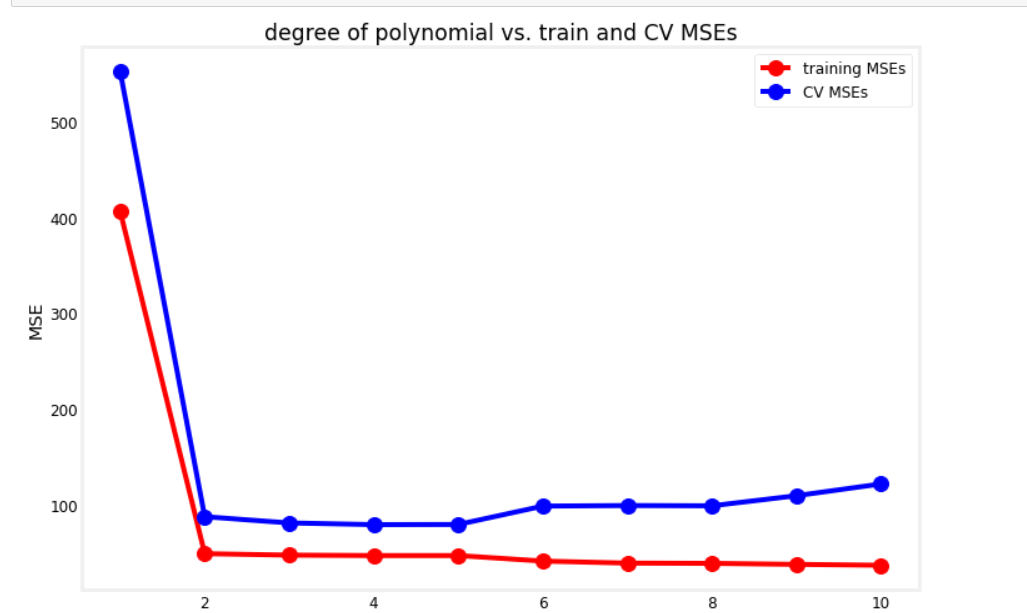